# Image Processing with Python -- Tutorial Pipeline -- <font color='orange'>SOLUTIONS</font>

##  About this Tutorial -- <font color='orange'> Notes on the Solutions </font>

These are the **complete solutions** to the tutorial. For the best learning experience, *it is recommended that you first try to implement a solution yourself* (see `tutorial_pipeline.py`). Only come here if you are totally stuck or if you have a working solution and would like to double-check it.

Note that there are multiple ways of implementing any particular step in the pipeline, so if your solution is different from the solution here, it is not necessarily wrong. However, *some solutions are better than others* because they are...

1. ...more readable:
    - When reading the code, it is obvious and clear what the code is doing
    - The code is clearly commented to help others (and your future self) understand it


2. ...more general:
    - The code still works if there are minor changes to the data (e.g. size of the image being processed)
    - The code can easily be transformed into a solution for a similar problem


3. ...more computationally efficient:
    - No unnecessary copies of large datasets are made (memory efficiency)
    - Faster algorithms are used, e.g. array operations instead of loops (CPU efficiency)
    - No unnecessary loading and writing of data (io efficiency)


It is up to you to decide if your solution is better, equally good, or not as good as the solution presented here. Either way, we hope you can learn something by looking at our solutions. **:)**

## Setup

In [2]:
from __future__ import division
print 3/2

1.5


## Importing Modules & Packages

In [3]:
# The numerical array package numpy as np
import numpy as np

#### <font color='orange'> Exercise Solution </font> 

Using the import command as above, follow the instructions in the comments below to import two additional modules that we will be using frequently in this pipeline.

In [4]:
# The plotting module matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# The image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

## Importing & Handling Image Data

#### <font color='orange'> Exercise Solution </font>

We will now proceed to import some image data, verifying that we get what we expect and then further specifying the data we will work with. Before you start, it makes sense to have a quick look at the data in Fiji/ImageJ so you know what you are working with!

Follow the instructions in the comments below.

Loaded array is of type: <type 'numpy.ndarray'>
Loaded array has shape: (2L, 930L, 780L)
Loaded values are of type: uint8


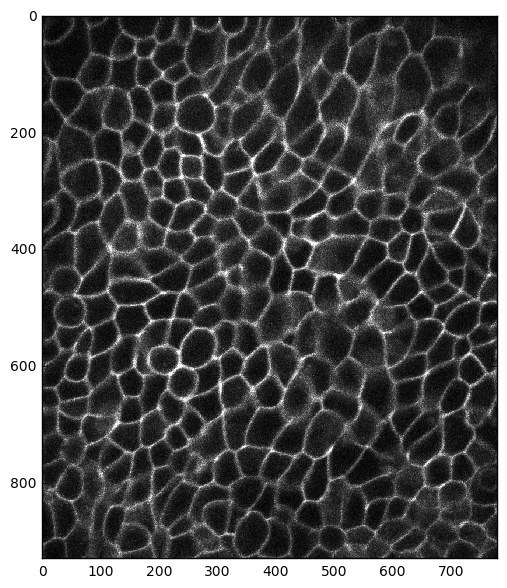

In [5]:
# (i) Specify the filename
# Create a string variable with the name of the file to be imported ('example_cells_1.tif')
# Suggested name for the variable: filename
# Note: If the file is not in your current working directory, the filename variable must contain the 
#       entire path to the file, for example r'/home/jack/data/example_cells_1.tif'. Note the r at
#       the beginning of the string: it designates this string as a "raw" string, which helps to
#       avoid problems with slashes and other special symbols
filename = r'/home/jack/data/example_cells_1.tif'
filename = 'example_cells_1.tif'   # XXX: DELETME!


# (ii) Load the image
# Import the function 'imread' from the module 'tifffile'.
from tifffile import imread

# Load 'example_cells_1.tif' and store it in a variable.
# Suggested name for the variable: img
img = imread(filename)


# (iii) Check that everything is in order
# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print "Loaded array is of type:", type(img)

# Print the shape of the array using the numpy-function 'shape'. 
# Make sure you understand the output; recall that the image has 2 color channels and is 930 by 780 pixels. 
print "Loaded array has shape:", img.shape

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print "Loaded values are of type:", img.dtype

# SOLUTION NOTE: The dtype should be 'uint8', because these are unsigned 8-bit integer images.
#                This means that the intensity values range from 0 to 255 in steps of 1.


# (iv) Allocate the green channel to a separate new variable
# For segmentation, we will only work with the green channel, so we need to allocate it to a new variable. 
# The green channel in this image is the first channel (or channel 0 in python). 
# We can allocated it to a new variable by slicing the 'img' array.
# Hint: Recall that the image has three dimensions, two (rows and columns) defining the size of the image 
#       in terms of pixels, and one defining the number of channels. To slice the array, you need to index  
#       each dimension to specify what you want from it.
#       For example, array A below has two dimensions.
#         A = np.array([[1,2,3],[4,5,6]])
#       To obtain all entries in the first row, we would slice like this:
#         B = A[0,:]
#       You can slice the 2D green channel out of the 3D 'img' array in a similar fashion. 
green = img[0,:,:]


# (v) Look at the image to confirm that everything worked as intended
# Show one of the channels as an image; use pyplot's functions plt.imshow followed by plt.show. 
# Check the documentation for plt.imshow and note the parameters that can be specified, such as the color map (cmap)
# and interpolation. Since you are working with scientific data, interpolation is unwelcome, so you should set it to
# 'none'. The most common cmap for grayscale images is naturally 'gray'.
# You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with
# the function plt.figure before calling plt.imshow. The canvas size is adjusted using the keyword argument
# figsize when calling plt.figure.
plt.figure(figsize=(7,7))
plt.imshow(green,interpolation='none',cmap='gray')
plt.show()

## Preprocessing

#### <font color='orange'> Exercise Solution </font>

Follow the instructions in the comments below:

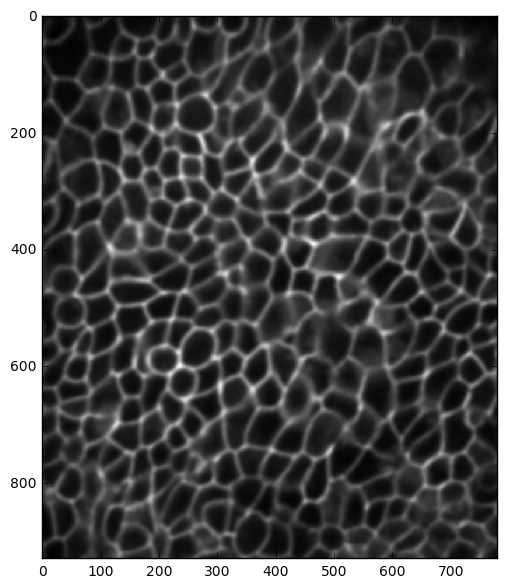

In [6]:
# (i) Create a variable for the smoothing factor sigma, which should be an integer value
# After implementing the Gaussian smoothing function below, you can modify this variable 
# to find the ideal value of sigma.
sigma = 3

# (ii) Perform the smoothing on the image
# To do so, use the Gaussian filter function 'ndi.filters.gaussian_filter' from the 
# image processing package ndimage, which was imported at the start of the tutorial. 
# Check out the documentation of scipy to see how to implement this function. 
# Allocate the output to a new variable.
green_smooth = ndi.filters.gaussian_filter(green,sigma)

# (iii) Visualize the result using plt.imshow and plt.show
# Compare with the original image visualized in the step above. 
# Does the output make sense? Is this what you expected? 
# Can you optimize sigma such that the image looks smooth without blurring the membranes too much?
plt.figure(figsize=(7,7))
plt.imshow(green_smooth,interpolation='none',cmap='gray')
plt.show()

## Adaptive Thresholding

#### <font color='orange'> Exercise Solution </font>

Implement the two steps of adaptive background subtraction:

1. Use a strong "mean filter" to create the background image. This simply assigns each pixel the average value of its local neighborhood. Just like the Gaussian blur, it can be done by deconvolution, but this time using a "uniform kernel".

2. Use the background image for thresholding. Pixels with higher values in the original image than in the background should be given the value 1 and pixels with lower values in the original image than in the background should be given the value 0. The resulting binary image should represent the cell membranes.

Follow the instructions in the comments below.

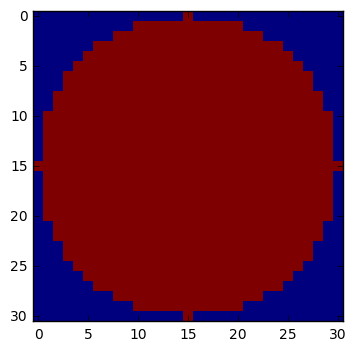

In [7]:
# Step 1

# (i) Create a disk-shaped structuring element and asign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel. 
#
# An example of a small disk-shaped SE would be this:
#   0 0 1 0 0
#   0 1 1 1 0
#   1 1 1 1 1
#   0 1 1 1 0
#   0 0 1 0 0
#
# The equation below creates such structuring elements. 
# It is an elegant but complicated piece of code and at the moment it is not 
# necessary for you to understand it in detail. Use it to create structuring 
# elements of different sizes (by changing 'i') and find a way to visualize 
# the result.
# 
# Try to answer the following questions: 
#   - Is the resulting SE really circular?  >>> Close enough for large i, not so much for small i
#   - Can certain values of 'i' cause problems? If so, why?  >>> Even values create a slight asymmetry!
#   - What value of i should used for the se? 
#     Note that, similar to the sigma in Gaussian smoothing, the size of the SE
#     is first estimated based on the images and by thinking about what would 
#     make sense. Later, it can be optimized by trial and error.
#     >>> My first guess was i=30 (about 3x the membrane diameter). 
#         I tried out some other values but ultimately stuck with this.
i = 31
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2
plt.imshow(struct,interpolation='none')
plt.show()

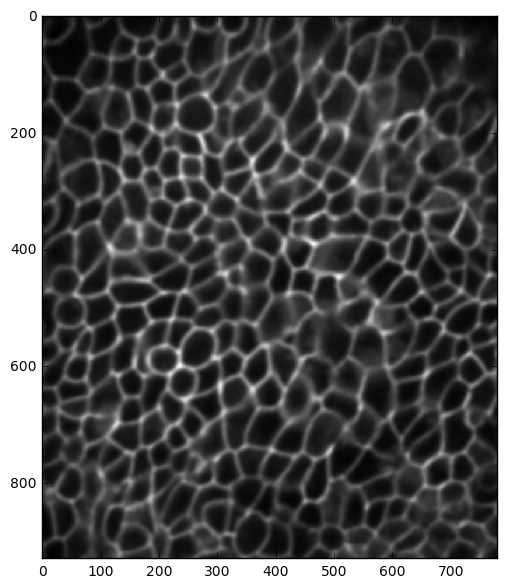

In [8]:
# (ii) Create the background
# Run a mean filter over the image using the disc SE and assign the output to a new variable.
# Use the function 'skimage.filters.rank.mean' (you first need to import the 'skimage.filters.rank' module).
# Think about why a mean filter is used and if a different function (e.g. minimum, maximum or median) 
# would work equally well.
from skimage.filters import rank 
bg = rank.mean(green_smooth, selem=struct)

# (iii) Visualize the resulting background image. 
# Compare it to the images generated above. Does the outcome make sense?
plt.figure(figsize=(7,7))
plt.imshow(green_smooth,interpolation='none',cmap='gray')
plt.show()

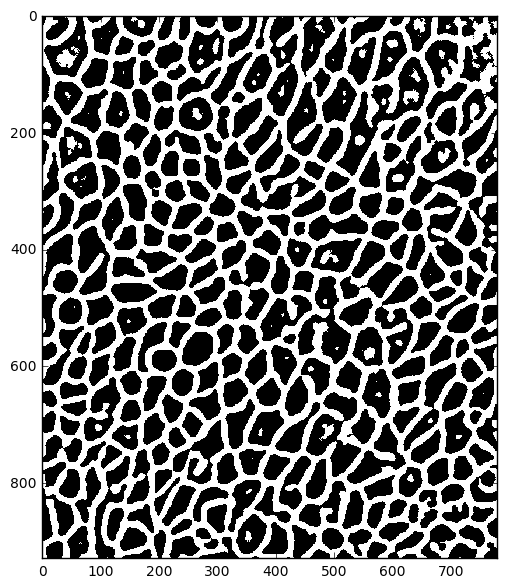

In [9]:
# Step 2  

# (iv) Threshold the Gaussian-smoothed original image using the background image created in step 1 
#      to obtain the cell membrane segmentation
# Set pixels with higher values in the original than in the bg to 1 and pixels with lower values to 0. 
# You can use a "relational operator" to do this, since numpy arrays will automatically perform element-wise
# comparisons when compared to other arrays of the same shape.
green_mem = green_smooth >= bg

# (v) Visualize and understand the output. 
# What do you observe? 
# Are you happy with this result as a membrane segmentation? 
# >>> Not really; there is too much stuff inside the cells!
plt.figure(figsize=(7,7))
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

## Improving Masks with Binary Morphology

#### <font color='orange'> Exercise Solution </font>

Improve the membrane segmentation from above with morphological operations.

Specifically, use `binary hole filling` to get rid of the speckles of foreground pixels that litter the insides of the cells. Furthermore, try different other types of morphological filtering to see how they change the image and to see if you can improve the membrane mask even more, e.g. by filling in gaps.

Follow the instructions in the comments below.

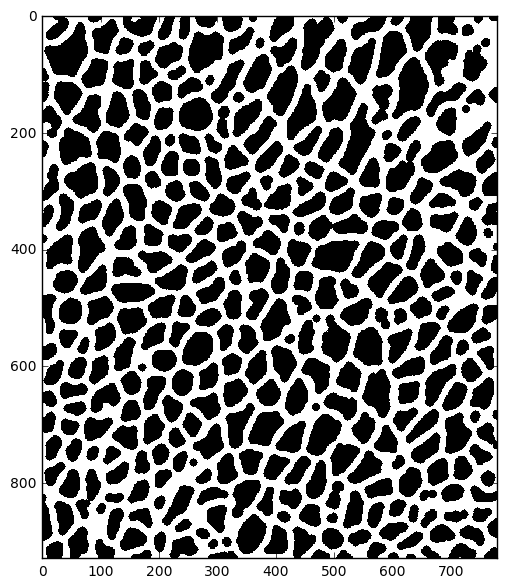

In [10]:
# (i) Get rid of speckles using binary hole filling
# Use the function ndi.binary_fill_holes for this. Be sure to read up on the docs to
# understand exactly what it does. For this to work as intended, you will have to 
# invert the mask, which you can do using the function np.logical_not. Again, be
# sure to understand why this has to be done.
green_mem_holes_filled = ndi.binary_fill_holes(np.logical_not(green_mem))

# (ii) Try out other morphological operations to further improve the membrane mask
# The various operations are available in ndimage, for example ndi.binary_closing.
# Play around and see how the different functions affect the mask. Can you optimize
# the mask, for example by closing gaps?
# Note that the default SE for these functions is a square. Feel free to create a
# new disc-shaped SE and see how that changes the outcome.
# Also, if you pay close attention you will notice that some of these operations
# introduce artifacts at the image boundaries. Can you come up with a way of
# solving this?

# New circular SE of appropriate size (size determined by trial and error)
i = 15
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# One solution to the boundary issues is padding with the reflection
# 'Padding' means the addition of pixels to the image. This means the boundary issues
# will happen outside of the 'actual' image, which can then be cropped out again.
pad_size = i+1
padded_mem = np.pad(green_mem_holes_filled,pad_size,mode='reflect')

# Binary closing works well to round off the membranes and close gaps
mem_final = ndi.binary_closing(np.logical_not(padded_mem),structure=struct)

# This slicing crops the padded image back to the original size
mem_final = mem_final[pad_size:-pad_size,pad_size:-pad_size]

# (iii) Visualize the final result
# At this point you should have a pretty neat membrane mask.
# If you are not satisfied with the quality your membrane segmentation, you should go back 
# and fine tune size of the SE in the adaptive thresholding section and also optimize the
# morphological cleaning operations.
# Note that the quality of the membrane segmentation will have a significant impact on the 
# cell segmentation we will perform downstream.
plt.figure(figsize=(7,7))
plt.imshow(mem_final,interpolation='none',cmap='gray')
plt.show()

## Connected Components Labeling

#### <font color='orange'> Exercise Solution </font>

Use your membrane segmentation for connected components labeling.

Follow the instructions in the comments below.

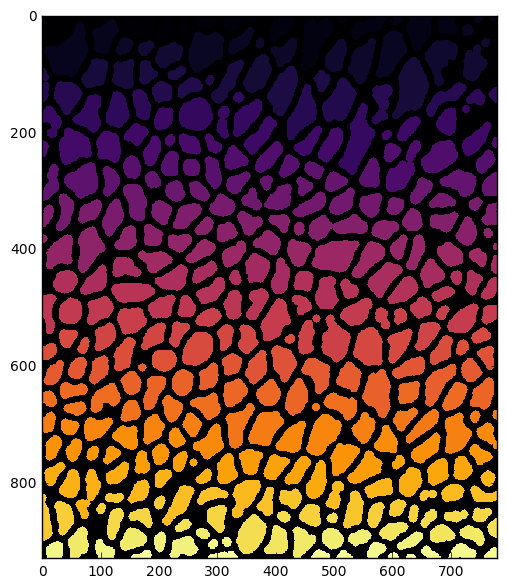

In [11]:
# (i) Label connected components
# Use the function ndi.label from ndimage. 
# Note that this function labels foreground pixels (`1`), so you may need to invert your mask
# again if your membrane mask is currently labeled as foreground.
mem_final = np.logical_not(mem_final)
cell_labels,_ = ndi.label(mem_final)

# (ii) Visualize the output
# Here, it is no longer ideal to use a 'gray' colormap, since we want to visualize that each
# cell has a unique ID. Play around with different colormaps (check the docs to see what
# types of colormaps are available) and choose one that you are happy with
# Take a close look at the picture and note mistakes in the segmentation. Depending on the
# quality of your membrane mask, there will most likely be some cells that are falsely 
# labeled as the same cells; this is called "under-segmentation". We will resolve this
# issue in the next step. Note that our downstream pipeline does not involve any steps to
# resolve "over-segmentation", so you should fine-tune your membrane mask such that this
# is not a common problem.
plt.figure(figsize=(7,7))
plt.imshow(np.zeros_like(cell_labels))
plt.imshow(cell_labels,interpolation='none',cmap='inferno')
plt.show()

## Cell Segmentation by Seeding & Expansion

### Seeding by Distance Transform

#### <font color='orange'> Exercise Solution </font>

Retrieve seeds using distance transformation.

This involves the following three steps:

1. Run the distance transform on your membrane mask.

2. Due to irregularities in the membrane shape, the distance transform may have some smaller local maxima in addition to those at the center of the cells. This will lead to additional seeds, which will lead to over-segmentation. To resolve this problem, smoothen the distance transform by applying a dilation/maximum filter. 

3. Find the seeds by detecting local maxima. Optimize the seeding by changing the dilation in step 2, aiming to have exactly one seed for each cell.

Follow the instructions in the comments below.

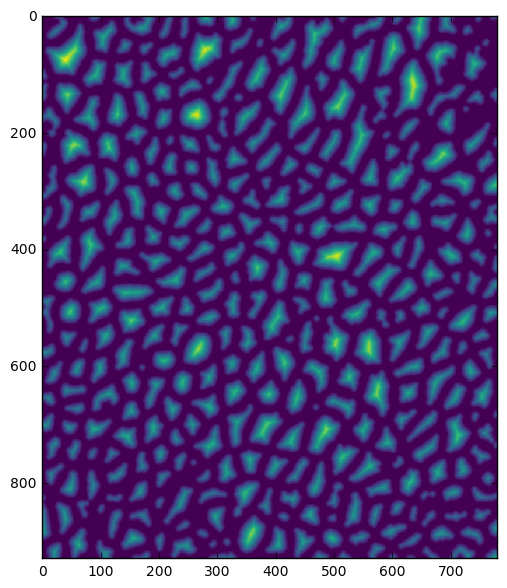

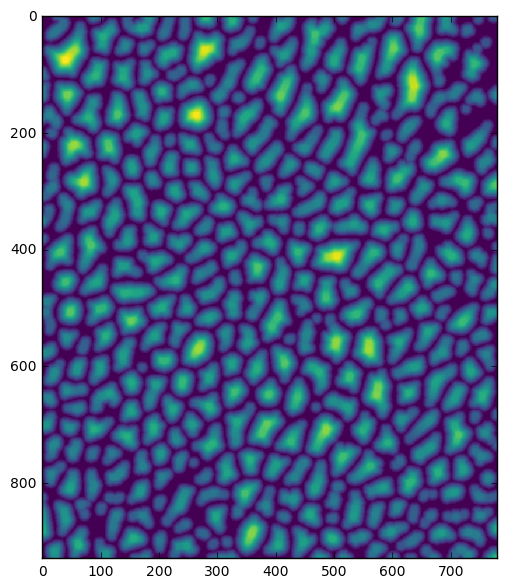

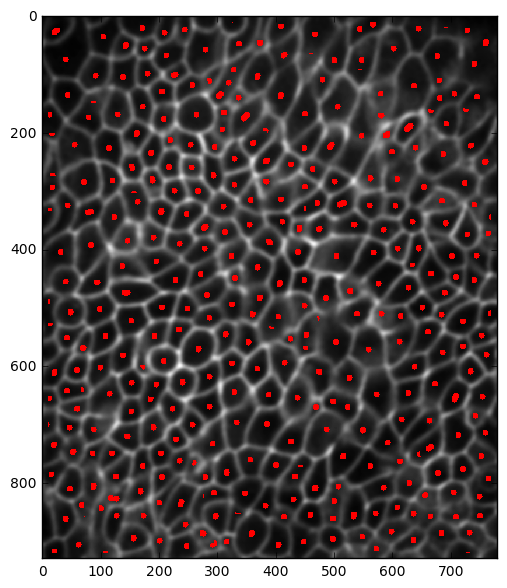

In [12]:
# (i) Distance transform on thresholded membranes
# Use the function ndi.distance_transform_edt.
dist_trans = ndi.distance_transform_edt(mem_final)
    
# (ii) Visualise the output and understand what you are seeing.
plt.figure(figsize=(7,7))
plt.imshow(dist_trans,interpolation='none',cmap='viridis')
plt.show()

# (iii) Dilate the distance threshold
# Use ndi.filters.maximum_filter to dilate the distance transform.
# Read the documentation to remind yourself how and where the structuring element can be defined with this function.
# You can try different SE sizes and shapes. 

# Using again a circular SE
i = 10
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# Running the dilation
dist_trans_dil = ndi.filters.maximum_filter(dist_trans, footprint=struct) 

# Visualizing again
plt.figure(figsize=(7,7))
plt.imshow(dist_trans_dil, interpolation='none', cmap='viridis')
plt.show()


# (iv) Retrieve the local maxima (the 'peaks') in the distance transform
# Use the function peak_local_max from the module skimage.feature. By default, this function will return the
# indices of the pixels where the local maxima are. However, we instead need a boolean mask of the same shape 
# as the original image, where all the local maximum pixels are labeled as `1` and everything else as `0`.
# This can be achieved by setting the keyword argument 'indices' to False.
from skimage.feature import peak_local_max
seeds = peak_local_max(dist_trans_dil, indices=False, min_distance=10)

# (v) Visualize the output as an overlay on the original (smoothed) image
# If you just look at the local maxima image, it will simply look like a bunch of distributed dots.
# To get an idea if the seeds are well-placed, you will need to overlay these dots onto the original image.
# To do this, it is important to first understand a key point about how the pyplot module works: 
# every plotting command is slapped on top of the previous plotting commands, until everything is ultimately 
# shown when plt.show is called. Hence, you can first plot the original input (or the smoothed) image and 
# then plot the seeds on top of it before showing both with 'plt.show'.
# As you can see if you try this, you will not get the desired result because the zero values in seed array
# are painted in black over the image you want in the background. To solve this problem, you need to mask 
# these zero values before plotting the seeds. You can do this by creating an appropriately masked array
# using the function 'np.ma.array'. Check the docs to figure out how to do this.
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds,mask=seeds==0),interpolation='none',cmap='autumn')
plt.show()

# (vi) Optimize the seeding
# Ideally, there should be exactly one seed for each cell.
# If you are not satisfied with your seeding, go back to the dilation step above and optimize it to get 
# rid of additional maxima. You can also try using the keyword argument min_distance in peak_local_max 
# to solve cases where there are multiple small seeds at the center of a cell.
# Note that good seeding is essential for a good segmentation with an expansion algorithm. However,
# no segmentation is ever perfect, so it's okay if a few cells end up being oversegmented!


# (vii) Label the seeds
# Use connected component labeling to give each cell seed a unique ID number.
seeds_labeled = ndi.label(seeds)[0]

### Expansion by Watershed

#### <font color='orange'> Exercise Solution </font>

Expand your seeds by means of a watershed expansion.

Follow the instructions in the comments below.

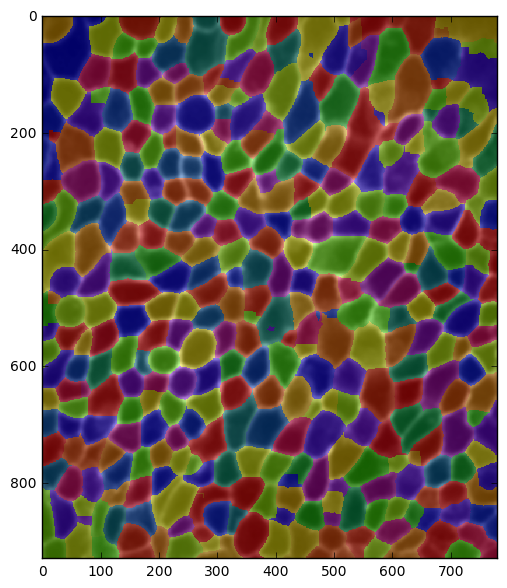

In [31]:
# (i) Perform watershed
# Use the function watershed from the module skimage.morphology.
# Use the labeled cell seeds and the smoothed membrane image as input.
from skimage.morphology import watershed
ws = watershed(green_smooth,seeds_labeled)

# (ii) Show the result as transparent overlay over the smoothed input image
# This can be done similar to the masked overlay of the seeds, but now you don't need to mask 
# the background in the overlayed image (there will be none, since everything gets labeled in
# the watershed). Instead, you need to make the overlayed image semi-transparent. 
# This can be achieved using the optional argument 'alpha' of the 'plt.imshow' function 
# to specify the opacity.
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(ws,interpolation='none',cmap='prism',alpha=0.4)
plt.show()

#### *A Note on Segmentation Quality*

This concludes the segmentation of the cells in the example image. Depending on the quality you achieved in each step along the way, the final segmentation may be of greater or lesser quality (in terms of over-/under-segmentation errors).

It should be noted that the segmentation will likely *never* be 'perfect'! This can't be helped because image segmentation is ultimately a `computational classification task` and all such tasks are subject to a fundamental trade-off between specificity and sensitivity, which in this case takes the form of a trade-off between over- and under-segmentation.

This raises an important question: ***when should I stop trying to optimize my segmentation?***

There is no absolute answer to this question, but the best answer is probably ***when you can use it to address your biological questions.***

*Importantly, this implies that you should already have a relatively clear question in mind when you are working on the segmentation!*

## Postprocessing: Removing Cells at the Image Border

#### <font color='orange'> Exercise Solution </font>

Iterate through all the cells in your segmentation and remove those that are at the image border.

Follow the instructions in the comments below. Note that the instructions will tend to be less specific from here on, so you need to figure out how to approach a problem yourself.

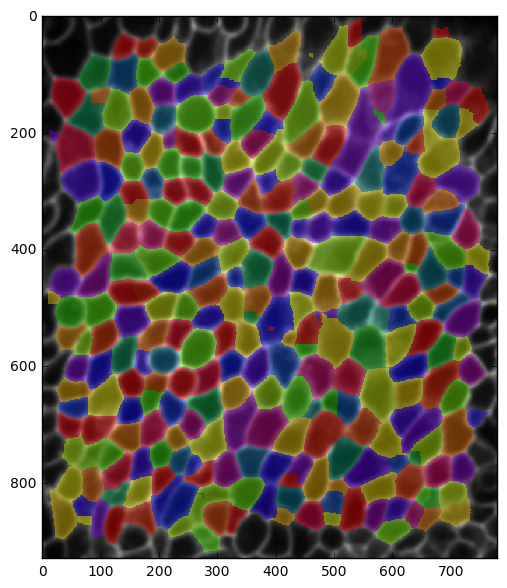

In [35]:
# (i) Create image border mask
# We need some way to check if a cell is at the border. For this, we generate a 'mask' of the image border,
# i.e. a Boolean array of the same size as the image where only the border pixels are set to `1` and all 
# others to `0`, like this:
#   1 1 1 1 1
#   1 0 0 0 1
#   1 0 0 0 1
#   1 0 0 0 1
#   1 1 1 1 1
# There are multiple ways of generating this mask, for example by erosion or by array indexing.
# It is up to you to find a way to do it.
boundary_mask = np.ones(ws.shape,dtype=np.bool)
boundary_mask = np.logical_not(ndi.binary_erosion(boundary_mask,border_value=0))


# (ii) 'Delete' the cells at the border:
# Note: When modifying a segmentation (in this case by deleting some cells), it makes sense
#       to work on a copy of the array, not on the original. This avoids unexpected behaviors,
#       especially within jupyter notebooks. Use the function np.copy to copy an array.
clean_ws = np.copy(ws)

# Iterate over all cells in the segmentation. Use a for-loop and the function np.unique;
# remember that each cell in our segmentation is labeled with a different integer.
for cell_ID in np.unique(ws):

    # For each cell, test if it has pixels touching the image boundary or not. Use the border mask
    # from above in this step. It is up to you to find a way to do this.
    cell_mask = ws==cell_ID                                           # Mask of the current cell
    cell_boundary_overlap = np.logical_and(cell_mask,boundary_mask)   # Overlap of cell mask and boundary mask
    total_overlapping_pixels = np.sum(cell_boundary_overlap)          # Sum overlapping pixels
    if total_overlapping_pixels > 0:                                  # If there are overlapping pixels, delete the cell
        
        # 'Delete' the cells that touch the image boundary by setting their pixels to 0.
        clean_ws[cell_mask] = 0


# OPTIONAL: re-label the remaining cells to keep the numbering consistant from 1 to N (with 0 as background).
for new_ID,cell_ID in enumerate(np.unique(clean_ws)[1:]):  # The [1:] excludes 0 from the list (background)!
    clean_ws[clean_ws==cell_ID] = new_ID+1                 # The same here for the +1


# (iii) Visualize the result
# Show the result as transparent overlay over the original/blurred image. 
# Here you have to combine alpha (to show cells transparently) and 'np.ma.array'
# (to hide empty space where the border cells were deleted).
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(clean_ws,mask=clean_ws==0),interpolation='none',cmap='prism',alpha=0.4)
plt.show()

## Identifying Cell Edges

#### <font color='orange'> Exercise Solution </font>

Create a labeled mask of cell edges by following these steps:


- Create an empty array of the same size and data type as the segmentation
    - This will be your final cell edge mask; you gradually add cell edges as you iterate over cells
    

- *For each cell:*
    - Erode the cell's mask by 1 pixel
    - Using the eroded mask and the original mask, create a new mask of only the cell's edge pixels
    - Add the cell's edge pixels into the empty image generated above, labeling them with the cell's original ID number


Follow the instructions in the comments below.

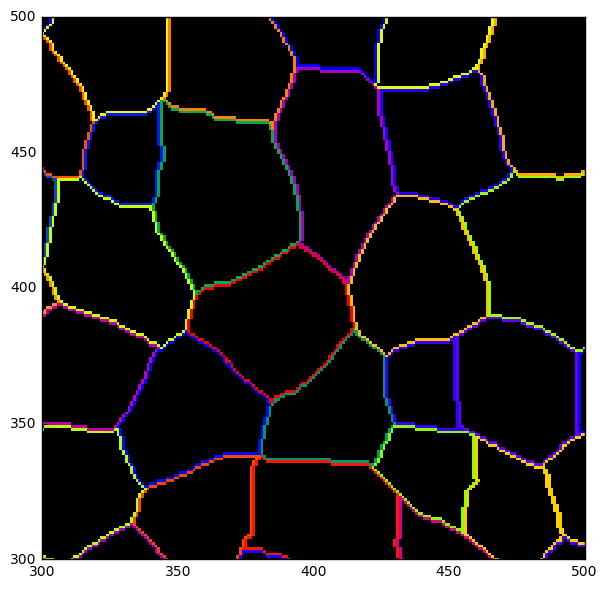

In [77]:
# (i) Create an empty array of the same size and data type as the segmentation
# Hint: np.zeros_like(...) or np.zeros(...,dtype=...)
edges = np.zeros_like(clean_ws)


# (ii) Iterate over the cells
# Hint: np.unique
for cell_ID in np.unique(clean_ws)[1:]:

    # (iii) Erode the cell's mask by 1 pixel
    # Hint: smart indexing and ndi.binary_erode
    cell_mask = clean_ws==cell_ID
    eroded_cell_mask = ndi.binary_erosion(cell_mask)
    
    # (iv) Create cell edge mask
    # Hint: np.logical_xor
    edge_mask = np.logical_xor(cell_mask,eroded_cell_mask)
    
    # (v) Add the cell edge mask to the empty array generated above, labeling it with the cell's ID
    # Hint: smart indexing
    edges[edge_mask] = cell_ID


# (vi) Visualize the result
# Note: Because the lines are so thin (1pxl wide), they may not be displayed correctly in small images.
#       If you wish, you can try and find a solution for this problem. One simple option is just to
#       show a (zoomed-in) sub-region of the image.
plt.figure(figsize=(7,7))
plt.imshow(np.zeros_like(edges),cmap='gray',vmin=0,vmax=1)  # Black background
plt.imshow(np.ma.array(edges,mask=edges==0),interpolation='none',cmap='prism')
plt.xlim((300,500))
plt.ylim((300,500))
plt.show()

## Extracting Quantitative Measurements

#  <font color='red'> YOU ARE HERE! </font>

To exemplify how different properties of cells can be measured, we will quantify the following:

- Cell ID (so all other measurements can be traced back to the cell that was measured)
- Mean intensity of each cell, for each channel
- Mean intensity at the membrane of each cell, for each channel
- The cell size, in terms of the number of pixels that make up the cell
- The cell outline length, in terms of the number of pixels that make up the cell boundary

We will use a dictionary to collect all the information in an orderly fashion.

#### Exercise
Follow the instructions in the comments below.

In [ ]:
# (i) Create a dictionary that contains a key-value pairing for each of the measurements mentioned above. The key should be a string describing the type of measurement (e.g. 'green_intensity_mean') and the value should be an empty list. We will fill these empty lists with the results of our measurements and the dictionary will make it easy to retrieve this data.
results = {"cell_id":[],
           "green_mean":[],
           "red_mean":[],
           "green_membrane_mean":[],
           "red_membrane_mean":[],
           "cell_size":[],
           "cell_outline":[]}

# (ii) Record the measurements:
    
    # Iterate over segmented cells using a for loop and the 'np.unique' function (you've done this before in exercise (ii) of section 7)
for cell_id in np.unique(green_ws)[1:]:
        # Mask away everything in the image except the current cell
    cell_mask = green_ws==cell_id  
    edge_mask = np.logical_and(cell_mask,green_edges)
        # Use the masked image to acquire the measurements listed above. Add them to the appropriate list in the result dictionary (you can use the list method 'list.append' to add elements to a list). Note that you should use the original raw data for quantification. 
    results["cell_id"].append(cell_id)
    results["green_mean"].append(np.mean(img[0,:,:][cell_mask]))
    results["red_mean"].append(np.mean(img[1,:,:][cell_mask]))    
    results["green_membrane_mean"].append(np.mean(img[0,:,:][edge_mask]))    
    results["red_membrane_mean"].append(np.mean(img[1,:,:][edge_mask]))    
    results["cell_size"].append(np.sum(cell_mask))
    results["cell_outline"].append(np.sum(edge_mask))
    
# Hint 1: If you have saved the final segmentation in 'green_ws', you can run the following code to see what is meant by "masking away" everything except the current cell. For membrane measurements you can use 'green_edges' instead.
#cell_mask = green_ws==1
#plt.imshow(cell_mask)
#plt.show()


# Hint 2: Recall that you can index an array with another (logical) array. This makes the acquisition of measurements for each cell much easier. This is a simple example (note that the raw data is used):
#cell1 = img[0,:,:][cell_mask]
#print cell1
#cell1_mean = np.mean(cell1)
#print cell1_mean


## Simple Analysis & Visualisation

Now that you have collected the readouts to a dictionary you can analyse them in any way you wish. This section shows how to do basic plotting and analysis of the results, including mapping the data back onto the image (as a 'heatmap') and producing boxplots, scatterplots and a linear fit. A more in-depth example of how to couple image analysis into advanced data analysis can be found in 'data_analysis' in the 'optional_advanced_material' directory.

#### Exercise
Follow the instructions in the comments below.

In [ ]:
# (i) First get yourself an overview of what you're working with by printing the results. You can print all results by iterating over the dictionary. Make sure you fully understand the data structure (the dict and the lists contained within) before you proceed.
for key in results.keys():
    print "\n" + key
    print results[key]

# (ii) Create a box plot showing the mean cell and mean membrane intensities for both channels. You first need to retrieve the data you need from the dictionary and structure it properly so you can pass it to 'plt.boxplot'. Use the 'label' keyword of 'plt.boxplot' to label the x axis with the corresponding key names. 
plt.boxplot([results[key] for key in results.keys()][2:-1],labels=results.keys()[2:-1])
plt.show()

# (iii) Create a scatter plot of green membrane intensity over cell size. Add a linear fit to the plot to viszualize a potential correlation.

    # Import the module 'stats' from 'scipy'       
from scipy import stats

    # Use the function 'stats.linregress' to do a linear fit of membrane intensity vs cell size. Be sure to read the documentation to understand the output of this function.
linfit = stats.linregress(results["cell_size"],results["red_membrane_mean"])

    # Create a scatter plot of the mean green membrane intensity vs cell size. Use the function 'plt.scatter' to do so. Remember to label the axes, using the functions 'plt.xlabel' and 'plt.ylabel'. 
plt.scatter(results["cell_size"],results["red_membrane_mean"])
plt.xlabel("cell size")
plt.ylabel("red_membrane_mean")

    # Define the equation of the line that fits the data. Recall that the equation of a straight line in 2D is y = m * x + c, where m is the slope and c is the intersection of the y-axis. You need to create a function that takes in a value (x) and returns the fitted value (y). You can define your function normally (using the 'def' keyword') or if you are feeling fancy you can create an anonymous function using 'lambda'. The example below shows the difference between a normal function and an anonymous function:

         # # normal function definition
         # 	def f(x): 
         #      """Returns the square value"""
         #      return x**2
         #
         # anonymous function
         # f = lambda x: x**2       # returns the square value
fit = lambda x: linfit[0] * x + linfit[1]

    # Next, you need to get the actual fitted values to plot your line. You only need to evaluate your function at two points at the limits of your scatter plot so you can draw the line across the entire plot. You can get the limits for the x axis using 'plt.gca' and then 'get_xlim'. Once you have these x values, you can get the corresponding fitted y values using your line function (if you used 'lambda' to define it, use 'map' to get the result).
ax = plt.gca()        
x_lims = ax.get_xlim()
fit_vals = map(fit,x_lims)

    # Plot the line         
        # Plot the line using 'plt.plot'. You can specify the aesthetics of the line, e.g. line width, color, and so forth - see the documentation.
plt.gca().set_autoscale_on(False)         # Prevent the figure from rescaling when line is added, by using plt.gca().set_autoscale_on(False)

    # Finally, use 'plt.show' to show the plot.
plt.show()
    
# (iv) Print out results from the linear regression (again, check the documentation of 'stats.linregress'):

    # Define a list with the names of the output of the linear regression (e.g. 'slope',...)
linnames = ["slope","intercept","r-value","p-value","stderr"]            # Names of results of stats.linregress

    # Iterate over all values in the 'stats.linregress' output.
print "\nLinear fit of cell size to red membrane intensity"              # Header
for index,value in enumerate(linfit):
        # Print the output value with the corresponding name. To simultaneously iterate over the output of 'stats.linregress' and over your list of output names, the function 'enumerate' is very helpful. You can check the docs or the web to find out how to use 'enumerate' in for-loops.
    print "  " + linnames[index] + "\t\t" + str(value)
    # (After the for loop), also calculate and print the r-squared value
print "  r-squared\t\t" + str(linfit[2]**2)
    # Note that this seems to return a highly significant p-value but a very low correlation coefficient (r-value). We also would not expect this correlation to be present in our data. This should prompt several considerations:
        # 1) What does this p-value actually mean? See help(stats.linregress)
        # 2) Could there be artefacts in our segmentation that could bias this analysis?
        # 3) We're now working with a lot of datapoints - this can skew statistical analyses. We can (and should!) accommodate this by multiple testing correction and by comparison with randomized datasets.
    # In general, it's always good to be very careful when doing data analysis. Make sure you understand the functions you are using and always check for possible errors or biases in your analysis!


# (v) Map the cell size back onto the image as a 'heatmap':

    # Scale the cells sizes to 8bit (since we need them as pixel intensity values). 
    # Hint: if the largest cell size should correspond to the value 255 in uint8, then the other cell sizes correspond to cell_size*255/largest_cell_size.
sizes_8bit = results["cell_size"] / max(results["cell_size"]) * 255
    # Initialize a new image; all values should be zeros, the size should be identical to e.g. 'green_ws' and the dtype should be uint8. (Suggested name for variable: 'size_img')
size_map = np.zeros_like(green_ws,dtype=np.uint8)    
    # Iterate over the segmented cells of 'green_ws'.(You need a for-loop, and the functions 'enumerate' and 'np.unique'.)
for index,cell_id in enumerate(np.unique(green_ws)[1:]):
        # Assign to each pixel of 'size_img' the cell size (in uint8) of the cell it corresponds to in 'green_ws'
    size_map[green_ws==cell_id] = sizes_8bit[index]
    # Visualize the result as a colored semi-transparent overlay over the smoothed input image 'green_smooth'.
plt.imshow(green_smooth,cmap='gray',interpolation='none')            # Set grayscale background image
plt.imshow(np.ma.array(size_map,mask=size_map==0),interpolation='none',alpha=0.7)  # Colored overlay
plt.show()

# (vi)
# Do an analysis of statistical tests and the rest of the measurements. Think about what the results actually mean and whether any inconsistancies can be traced back to a not sufficiently good segmentation, e.g. we  have filtered for some artifacts, such as incomplete cells (that touch the boundary), but not for others; can you think of some?.


## Writing Output to Files

There are several ways of saving the output of a program. Data can be saved to files in a human-readable format such as text files (e.g. to import into Excel), in a format readable for other programs such as tif-images (e.g. to visualize in Fiji) or in a language-specific file that makes it easy to reload the data into python in the future (e.g. for further analysis).

#### Exercise
Follow the instructions in the comments below.

In [ ]:
# (i) Write an image to a tif (could be opened e.g. in Fiji):

    # Get the file handling function 'imsave' from the package 'tifffile'
from tifffile import imsave
    # Save one of the images you've generated using 'imsave' and open it in Fiji
imsave(filename+"_labeledEdges.tif",green_edges_labeled,bigtiff=True)

# (ii) Write a figure to a png or pdf:

    # Recreate the scatter plot from above (without the regression line). Remember to label axes.
plt.scatter(results["cell_size"],results["red_membrane_mean"])  
plt.xlabel("cell size")                                    
plt.ylabel("red membrane mean")
    # Save the figure to png using 'plt.savefig'
plt.savefig(filename+'_scatter.png', bbox_inches='tight')
    # Save the figure to pdf using 'plt.savefig'. This creates a vector graphic that can be imported to illustrator etc.
plt.savefig(filename+'_scatter.pdf', bbox_inches='tight')


# ***For the next two exercises, refer to the python documentation for input and output.***

# (iii) Write a python file that can be reloaded in other Python programs:

    # Import the module 'json'
import json
    # Open an empty file object using 'open' in write ('w') mode. Use a name that contains the extension '.json'. You should use the 'with'-statement (context manager) to make sure that the file object will be closed automatically when you are done with it.
with open('k_resultsDict.json', 'w') as fp:
        # Use the function 'json.dump' to write the results.    
    json.dump(results, fp)       

# Note: This file could be re-loaded again as follows:
#with open(filename+'_resultsDict.json', 'r') as fp:
#   results = json.load(fp)


# (iv) Write a text file of the numerical data gathered (could be opened e.g. in Excel):

# Open an empty file object using 'open' in write ('w') mode. Use a name that contains the extension '.txt'. You should use the 'with'-statement (context manager) to make sure that the file object will be closed automatically when you are done with it.
with open(filename+"_output.txt","w") as txt_out:
    # Write the headers of the data (the result dictionary keys), separated with tabs ('\t'). You will need the function 'file.write' to write strings to the file. It makes sense to first generate a complete string of all the headers with a loop and then write it to the file.
    txt_out.write(''.join(key+'\t' for key in results.keys()) + '\n') 
    # Iterate over all cells saved in your results variable using a for-loop and the function 'enumerate'.
    for index,value in enumerate(results["cell_id"]):
        # For each key in the dict, write the data to the text file, separated with tabs ('\t').
        txt_out.write(''.join(str(results[key][index])+'\t' for key in results.keys()) + '\n')
    # After writing the data, have a look at the output file in a text editor.


This concludes the tutorial.